In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [2]:
# code for solving the model (remember documentation and comments)

import numpy as np
from scipy import optimize
import random

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from oliver import ExchangeEconomyClass
from chris import ExchangeEconomyClass

market = ExchangeEconomyClass()

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1
## Basic Edgeworth box

We call paretoC from market. The function iterates over all possible combinations of $(x_1^A, x_2^A)$ where $ x_1^A,x_2^A \in \{0,\frac{1}{75},\frac{2}{75},...,\frac{74}{75},1\}$

In [5]:
kombinationer = market.paretoC()
print(f'{len(kombinationer)} out of {75*75} combinations satisfy C')
print(type(kombinationer))


1543 out of 5625 combinations satisfy C
<class 'list'>


NameError: name 'dimensioner' is not defined

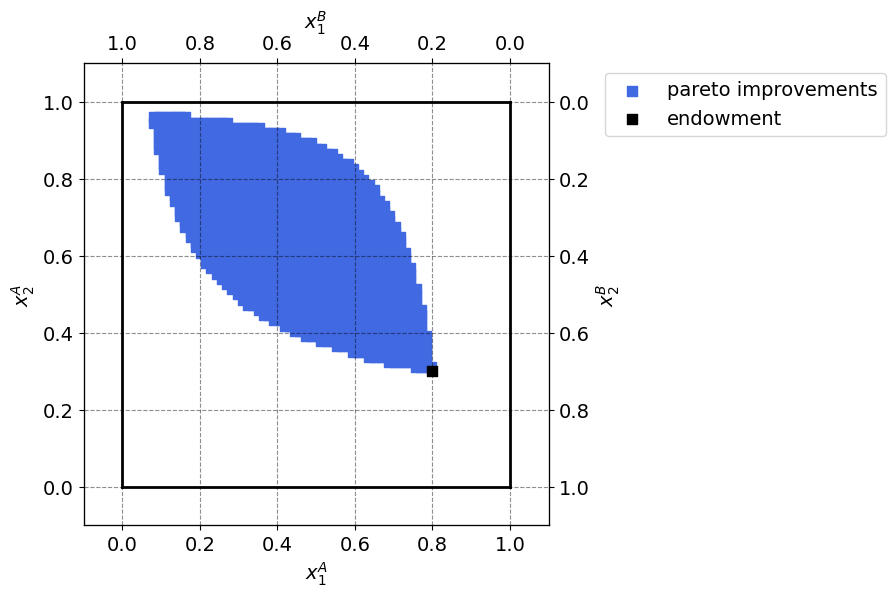

In [ ]:
market.plot_edgeworth()

# Question 2
## Market error

In [ ]:
# 1 Create price vector P_1 from 0.5 to 2.5
P_1 = market.P_1()

# 2 Calculate market clearing price from P_1
e1_best, e2_best, p1_best = market.market_clear(P_1)

print(f'Market clearing price = {p1_best:.4f}')

Market clearing price = 0.9533


In [ ]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_error,
N=widgets.fixed(75),
p1=widgets.FloatSlider(min=0.25, max=2.5, step=0.01, value = 0.94),
)

interactive(children=(FloatSlider(value=0.94, description='p1', max=2.5, min=0.25, step=0.01), Output()), _dom…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Question 3
## Market clearing price

$
x_1^{A*} (p_1,\omega^A) + x_1^{B*}(p_1,\omega^B) = 1 \Leftrightarrow$

$\alpha \frac{p_1 w_1^A+w_2^A}{p_1} + \beta \frac{p_1 w_1^A+w_2^B}{p_1} = 1 \Leftrightarrow$

$p_1 (1-\alpha w_1^A-\beta w_1^B) = \alpha w_2^A+\beta w_2^B \Leftrightarrow$

$p_1^* = \frac{\alpha w_2^A+\beta w_2^B}{1-\alpha w_1^A-\beta w_1^B}$

In [ ]:
par = market.par
p1_star = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)

print(f'Numerical market clearing price = {p1_best:.4f}')
print(f'Analytical market clearing price = {p1_star:.4f}\n')

market_eps_A = market.check_market_clearing(p1_best)
market_eps_B = market.check_market_clearing(p1_star)

print(f'Market error for numerical approach = {market_eps_A[0]:.5f}, {market_eps_A[1]:.5f}')
print(f'Market error for analytical approach= {market_eps_B[0]:.5f}, {market_eps_B[1]:.5f}')

Numerical market clearing price = 0.9533
Analytical market clearing price = 0.9444

Market error for numerical approach = -0.00559, 0.00533
Market error for analytical approach= 0.00000, 0.00000


ADD CONCISE CONLUSION.